In [66]:
%pylab inline
from yahoo_finance import Share
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as pltf
import numpy as np
#import random as rd


Populating the interactive namespace from numpy and matplotlib


In [67]:
# Start with one stock and the yahoo_finance function Share.
load = 'IBM'
security = Share(load)

In [ ]:
# Use yahoo_finance module function to pull in historical stock data of Open High
# Low and Closes.
# (Note this process was run once and **IS NOT REPEATED HERE** since it took ~2mn to get 
# all the historical data)
#  stocktable = security.get_historical('1960-04-01', '2016-04-20')

In [ ]:
# Save historical to CSV file. [ditto as for previous step - THIS STEP NOT REPEATED HERE]
#  stocktable.to_csv('/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/' + load + '.csv')

In [68]:
# Read the historical data into a Pandas dataframel
stocktable = pd.read_csv('/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/' + load + '.csv')
#/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/IBM.csv 

In [69]:
# Show the head. Note the index starts with the latest date.
# We will need to make the index start chronologically from the beginning day in the series
# so that plotting can go left to right in a chronological order. fyi the Unnamed column came
# natively with the yahoo.finance.get.historical function.
stocktable.head()

,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,0,146.110001,146.110001,2016-04-20,147.199997,144.000000,144.240005,IBM,6710500
1,1,144.000000,144.000000,2016-04-19,146.949997,142.610001,146.470001,IBM,13125200
2,2,152.529999,152.529999,2016-04-18,153.139999,151.490005,151.720001,IBM,5737700
3,3,151.720001,151.720001,2016-04-15,152.100006,150.960007,151.039993,IBM,3522400
4,4,151.160004,151.160004,2016-04-14,152.759995,150.380005,151.500000,IBM,3158400


In [70]:
# Create and seed the new index colum that will be used to reorder and resort the original dataframe.
stocktable['NewIndex'] = 0
stocktable.head(3)

,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,NewIndex
0,0,146.110001,146.110001,2016-04-20,147.199997,144.000000,144.240005,IBM,6710500,0
1,1,144.000000,144.000000,2016-04-19,146.949997,142.610001,146.470001,IBM,13125200,0
2,2,152.529999,152.529999,2016-04-18,153.139999,151.490005,151.720001,IBM,5737700,0


In [71]:
# set the NewIndex in reverse using the length of the file (in rows) so that the first record will be the 
# oldest date and progress forward from the top of the file. This will also enable charting which goes
# from left to right with earliest date to the left.
stocktable.NewIndex = max(stocktable.index) - range(len(stocktable))
stocktable.head()

,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,NewIndex
0,0,146.110001,146.110001,2016-04-20,147.199997,144.000000,144.240005,IBM,6710500,13668
1,1,144.000000,144.000000,2016-04-19,146.949997,142.610001,146.470001,IBM,13125200,13667
2,2,152.529999,152.529999,2016-04-18,153.139999,151.490005,151.720001,IBM,5737700,13666
3,3,151.720001,151.720001,2016-04-15,152.100006,150.960007,151.039993,IBM,3522400,13665
4,4,151.160004,151.160004,2016-04-14,152.759995,150.380005,151.500000,IBM,3158400,13664


In [72]:
# Check the end of the NewIndex dataframe to confirm operation that the earliest date is now the
# beginning of the NewIndex.

stocktable.tail()


,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,NewIndex
13664,13664,2.231525,549.500263,1962-01-08,559.500003,545.000267,559.500003,IBM,544000,4
13665,13665,2.274166,560.000253,1962-01-05,570.500243,558.999753,570.500243,IBM,363200,3
13666,13666,2.319852,571.250260,1962-01-04,576.999736,570.999742,576.999736,IBM,256000,2
13667,13667,2.343201,576.999736,1962-01-03,576.999736,572.000241,572.000241,IBM,288000,1
13668,13668,2.322898,572.000241,1962-01-02,578.499734,572.000241,578.499734,IBM,387200,0


In [73]:
# Set the new dataframe (stocktable2) and its index and permanently resort that index.

stocktable2 = stocktable.set_index(['NewIndex'])
stocktable2.sort_index(inplace=True)
stocktable2.head()


,Unnamed: 0,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
NewIndex,,,,,,,,,
0,13668,2.322898,572.000241,1962-01-02,578.499734,572.000241,578.499734,IBM,387200
1,13667,2.343201,576.999736,1962-01-03,576.999736,572.000241,572.000241,IBM,288000
2,13666,2.319852,571.250260,1962-01-04,576.999736,570.999742,576.999736,IBM,256000
3,13665,2.274166,560.000253,1962-01-05,570.500243,558.999753,570.500243,IBM,363200
4,13664,2.231525,549.500263,1962-01-08,559.500003,545.000267,559.500003,IBM,544000


In [74]:
# Remove unwanted columns.

stocktable2 = stocktable2[['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Adj_Close']]
stocktable2.head(3)


,Date,Symbol,Open,High,Low,Close,Adj_Close
NewIndex,,,,,,,
0,1962-01-02,IBM,578.499734,578.499734,572.000241,572.000241,2.322898
1,1962-01-03,IBM,572.000241,576.999736,572.000241,576.999736,2.343201
2,1962-01-04,IBM,576.999736,576.999736,570.999742,571.250260,2.319852


In [75]:
# Define the functions that will need to be called to transform the historical Open, High and Lows
# into historically relevant prices based on the 'governing' Adj_Close values which provide a
# continuously adjusted price series over time unlike the existing Open, High and Lows which are 
# expressed to conform to the current day valuation levels of the stock.

def newlow(x):
    if x['Adj_Close'] != x['Close']:
        return x['Low'] / (x['Close'] / x['Adj_Close'])
    else:
        return x['Low']
    
def newopen(x):
    if x['Adj_Close'] != x['Close']:
        return x['Open'] / (x['Close'] / x['Adj_Close'])
    else:
        return x['Open']
    
def newhigh(x):
    if x['Adj_Close'] != x['Close']:
        return x['High'] / (x['Close'] / x['Adj_Close'])
    else:
        return x['High']


In [76]:
# Run these functions and apply them to new Open, High and Low columns (NOpen, NHigh, Nlow):

stocktable2['NOpen'] = stocktable2.apply(newopen, axis=1)
stocktable2['NHigh'] = stocktable2.apply(newhigh, axis=1)
stocktable2['NLow'] = stocktable2.apply(newlow, axis=1)


In [77]:
# Visually review that the new Open, High and Low columns have been correctly adjusted in light of 
# the Adj_Close price. You can see that the 500 level prices are now expressed in the historically 
# relevant 2 level prices which correspond to the historically relevant Adj_Close price.

stocktable2.head()

,Date,Symbol,Open,High,Low,Close,Adj_Close,NOpen,NHigh,NLow
NewIndex,,,,,,,,,,
0,1962-01-02,IBM,578.499734,578.499734,572.000241,572.000241,2.322898,2.349292,2.349292,2.322898
1,1962-01-03,IBM,572.000241,576.999736,572.000241,576.999736,2.343201,2.322898,2.343201,2.322898
2,1962-01-04,IBM,576.999736,576.999736,570.999742,571.250260,2.319852,2.343201,2.343201,2.318835
3,1962-01-05,IBM,570.500243,570.500243,558.999753,560.000253,2.274166,2.316807,2.316807,2.270103
4,1962-01-08,IBM,559.500003,559.500003,545.000267,549.500263,2.231525,2.272134,2.272134,2.213250


In [78]:
# Visually review and confirm that there were no changes made to current dates in the dataframe where no
# adjustment is called for, i.e. current dates of today.

stocktable2.tail(3)

,Date,Symbol,Open,High,Low,Close,Adj_Close,NOpen,NHigh,NLow
NewIndex,,,,,,,,,,
13666,2016-04-18,IBM,151.720001,153.139999,151.490005,152.529999,152.529999,151.720001,153.139999,151.490005
13667,2016-04-19,IBM,146.470001,146.949997,142.610001,144.000000,144.000000,146.470001,146.949997,142.610001
13668,2016-04-20,IBM,144.240005,147.199997,144.000000,146.110001,146.110001,144.240005,147.199997,144.000000


In [79]:
# Round all needed column prices to 2 decimal points for simplicity.

stocktable2['NLow'] = np.round(stocktable2['NLow'],2)
stocktable2['NHigh'] = np.round(stocktable2['NHigh'],2)
stocktable2['NOpen'] = np.round(stocktable2['NOpen'],2)
stocktable2['Adj_Close'] = np.round(stocktable2['Adj_Close'],2)
stocktable2.head()


,Date,Symbol,Open,High,Low,Close,Adj_Close,NOpen,NHigh,NLow
NewIndex,,,,,,,,,,
0,1962-01-02,IBM,578.499734,578.499734,572.000241,572.000241,2.32,2.35,2.35,2.32
1,1962-01-03,IBM,572.000241,576.999736,572.000241,576.999736,2.34,2.32,2.34,2.32
2,1962-01-04,IBM,576.999736,576.999736,570.999742,571.250260,2.32,2.34,2.34,2.32
3,1962-01-05,IBM,570.500243,570.500243,558.999753,560.000253,2.27,2.32,2.32,2.27
4,1962-01-08,IBM,559.500003,559.500003,545.000267,549.500263,2.23,2.27,2.27,2.21


In [80]:
# Confirm this on the tail too.

stocktable2.tail()


,Date,Symbol,Open,High,Low,Close,Adj_Close,NOpen,NHigh,NLow
NewIndex,,,,,,,,,,
13664,2016-04-14,IBM,151.500000,152.759995,150.380005,151.160004,151.16,151.50,152.76,150.38
13665,2016-04-15,IBM,151.039993,152.100006,150.960007,151.720001,151.72,151.04,152.10,150.96
13666,2016-04-18,IBM,151.720001,153.139999,151.490005,152.529999,152.53,151.72,153.14,151.49
13667,2016-04-19,IBM,146.470001,146.949997,142.610001,144.000000,144.00,146.47,146.95,142.61
13668,2016-04-20,IBM,144.240005,147.199997,144.000000,146.110001,146.11,144.24,147.20,144.00


In [81]:
# Reduce the dataframe's columns to only those that will be needed in the model.

stocktable2 = stocktable2[['Date', 'Symbol', 'NOpen', 'NHigh', 'NLow', 'Adj_Close']]
stocktable2.head(3)


,Date,Symbol,NOpen,NHigh,NLow,Adj_Close
NewIndex,,,,,,
0,1962-01-02,IBM,2.35,2.35,2.32,2.32
1,1962-01-03,IBM,2.32,2.34,2.32,2.34
2,1962-01-04,IBM,2.34,2.34,2.32,2.32


In [82]:
# Visually confirm the tail too.
stocktable2.tail(3)

,Date,Symbol,NOpen,NHigh,NLow,Adj_Close
NewIndex,,,,,,
13666,2016-04-18,IBM,151.72,153.14,151.49,152.53
13667,2016-04-19,IBM,146.47,146.95,142.61,144.00
13668,2016-04-20,IBM,144.24,147.20,144.00,146.11


In [84]:
# Save the new re-indexed, re-sorted, tranformed and simplified dataset into a new file that will be called
# by the model. NOTE: This step was initially run but NOT RUN FOR THIS PRESENTATION as the file is already defined. 

load2 = 'IBM2'
stocktable2.to_csv('/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/' + load2 + '.csv')


In [85]:
# reload to drop the NEWINDEX.
load2 = 'IBM2'
XXX = pd.read_csv('/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/' + load2 + '.csv')

In [86]:
# Drop the new index.
stocktable = XXX.drop('NewIndex', axis=1)

In [87]:
# Visually check the result.
stocktable.tail()

,Date,Symbol,NOpen,NHigh,NLow,Adj_Close
13664,2016-04-14,IBM,151.50,152.76,150.38,151.16
13665,2016-04-15,IBM,151.04,152.10,150.96,151.72
13666,2016-04-18,IBM,151.72,153.14,151.49,152.53
13667,2016-04-19,IBM,146.47,146.95,142.61,144.00
13668,2016-04-20,IBM,144.24,147.20,144.00,146.11


In [88]:
# Visually check the result head.
stocktable.head()

,Date,Symbol,NOpen,NHigh,NLow,Adj_Close
0,1962-01-02,IBM,2.35,2.35,2.32,2.32
1,1962-01-03,IBM,2.32,2.34,2.32,2.34
2,1962-01-04,IBM,2.34,2.34,2.32,2.32
3,1962-01-05,IBM,2.32,2.32,2.27,2.27
4,1962-01-08,IBM,2.27,2.27,2.21,2.23


(<matplotlib.collections.LineCollection at 0x119a46210>,
 <matplotlib.collections.LineCollection at 0x11d087b10>)

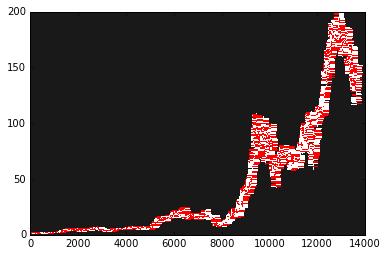

In [89]:
# Plot the entire time series.

ax1 = plt.subplot(1,1,1, axisbg='#191919')
pltf.plot_day_summary2_ohlc(ax1, stocktable.NOpen, stocktable.NHigh, stocktable.NLow, stocktable.Adj_Close, colorup='w', colordown='r')


In [91]:
#Sample a smaller range --- to get a better more defined look at the charting.
#s = rd.randrange(1000, 13000)
s = 10000
sample = stocktable[s:s+80]

(<matplotlib.collections.LineCollection at 0x11b7b1550>,
 <matplotlib.collections.LineCollection at 0x11b7bbc10>)

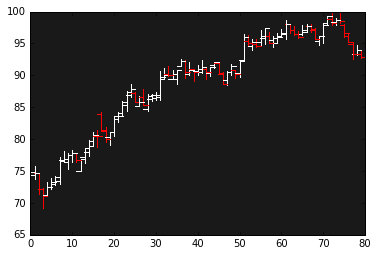

In [92]:
# Plot this 80 day interval
ax1 = plt.subplot(1,1,1, axisbg='#191919')
pltf.plot_day_summary2_ohlc(ax1, sample.NOpen, sample.NHigh, sample.NLow, sample.Adj_Close, colorup='w', colordown='r')

#The next part of the project is where the relative lows are determined and stored.


In [93]:
# Loop method to search for and create a dataframe conaiting the local lows (LLOW).

lows = []
c = 0
while c < (len(stocktable)-2):     
    if stocktable.NLow[c+1] < stocktable.NLow[c] and stocktable.NLow[c+1] < stocktable.NLow[c+2]:
        lo = float("{0:.2f}".format(stocktable.NLow[c+1]))
        lows.append(['LLOW',lo, c+1, stocktable.Date[c+1]])
    c = c+1
    
lows2 = pd.DataFrame(lows, columns = ['Type', 'NLow', 'OrInd', 'Date'])


In [94]:
# Visually check the first records of the new dataframe. OrInd is the original index
# from the sourcing table. Capturing it here allows for visual validation with the 
# sourcing table.

lows2.head()

,Type,NLow,OrInd,Date
0,LLOW,2.21,4,1962-01-08
1,LLOW,2.23,11,1962-01-17
2,LLOW,2.22,13,1962-01-19
3,LLOW,2.13,20,1962-01-30
4,LLOW,2.23,28,1962-02-09


In [95]:
# Confirm the tail of the dataset too.
lows2.tail()

,Type,NLow,OrInd,Date
2696,LLOW,138.09,13640,2016-03-10
2697,LLOW,144.49,13650,2016-03-24
2698,LLOW,147.81,13658,2016-04-06
2699,LLOW,148.58,13662,2016-04-12
2700,LLOW,142.61,13667,2016-04-19


In [96]:
# Set a new index for the local lows dataframe based on the original index (OrInd) found
# in the sourcing table.

lows3concat = lows2.set_index('OrInd')

In [97]:
# Inspect this 'transfer'.
lows3concat.head()

,Type,NLow,Date
OrInd,,,
4,LLOW,2.21,1962-01-08
11,LLOW,2.23,1962-01-17
13,LLOW,2.22,1962-01-19
20,LLOW,2.13,1962-01-30
28,LLOW,2.23,1962-02-09


In [98]:
# MERGE the lows dataframe into the original stock table.

result = pd.merge(left=stocktable,right=lows3concat, how='left')


In [99]:
# View the result of the merge and inspect.
# NOTE the placement of the local lows identified in the Type column with the original
# index being preserved. This can be inspected visually and confirmed looking closely
# at the successions of NLows. 
result

,Date,Symbol,NOpen,NHigh,NLow,Adj_Close,Type
0,1962-01-02,IBM,2.35,2.35,2.32,2.32,NaN
1,1962-01-03,IBM,2.32,2.34,2.32,2.34,NaN
2,1962-01-04,IBM,2.34,2.34,2.32,2.32,NaN
3,1962-01-05,IBM,2.32,2.32,2.27,2.27,NaN
4,1962-01-08,IBM,2.27,2.27,2.21,2.23,LLOW
5,1962-01-09,IBM,2.24,2.29,2.24,2.26,NaN
6,1962-01-10,IBM,2.26,2.27,2.26,2.26,NaN
7,1962-01-11,IBM,2.27,2.29,2.27,2.29,NaN
8,1962-01-12,IBM,2.29,2.31,2.29,2.29,NaN
9,1962-01-15,IBM,2.30,2.31,2.30,2.30,NaN


In [100]:
#Save the dataset with the new LLOW column to a new file
load3 = 'IBM3'
result.to_csv('/Users/tompichard/Documents/Personal/NEWPERSONAL/GADS/1.CAPSTONE/DevFiles/DATA/' + load3 + '.csv')



END of current progress.